## Use a simulated LSST survey to find how deep typical depths are after 1-year/10-years.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles


ModuleNotFoundError: No module named 'lsst.sims.maf'

In [2]:
dbFile = 'baseline2018a.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
bundleList = []

for filtername in ['u', 'g', 'r', 'i', 'z', 'y']:
    metric = metrics.Coaddm5Metric()
    slicer = slicers.HealpixSlicer()
    summ_stat = metrics.MedianMetric()
    sql = 'filter="%s"' % filtername
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=[summ_stat]))
    
    sql = 'night < 365 and filter="%s"' % filtername
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=[summ_stat]))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [6]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with constraint filter="i" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 514481 visits
Running:  ['opsim_CoaddM5_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night < 365 and filter="i" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 30745 visits
Running:  ['opsim_CoaddM5_night_lt_365_and_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night < 365 and filter="y" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 57904 visits
Running:  ['opsim_CoaddM5_night_lt_365_and_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter="g" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 234144 visits
Running:  ['ops

Plotting figures with "filter="i"" constraint now.
monopole: 26.2758  dipole: lon: 157.422, lat: -80.4555, amp: 0.169415
Plotting complete.
Plotting figures with "night < 365 and filter="i"" constraint now.
monopole: 24.7553  dipole: lon: -153.05, lat: -66.2164, amp: 0.43177
Plotting complete.
Plotting figures with "night < 365 and filter="y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 347 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 23.9207  dipole: lon: 108.745, lat: 48.0913, amp: 0.408944
Plotting complete.
Plotting figures with "filter="g"" constraint now.
monopole: 26.7826  dipole: lon: -137.275, lat: -81.07, amp: 0.340556
Plotting complete.
Plotting figures with "filter="u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 531 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 25.6446  dipole: lon: 104.12, lat: 64.6318, amp: 0.255279
Plotting complete.
Plotting figures with "night < 365 and filter="r"" constraint now.
monopole: 25.4567  dipole: lon: -177.111, lat: -42.8166, amp: 0.416332
Plotting complete.
Plotting figures with "night < 365 and filter="g"" constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 25.4181  dipole: lon: 157.198, lat: -83.5218, amp: 0.280334
Plotting complete.
Plotting figures with "night < 365 and filter="z"" constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.3571  dipole: lon: 145.994, lat: -70.0123, amp: 0.264397
Plotting complete.
Plotting figures with "filter="r"" constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 26.8337  dipole: lon: 144.232, lat: -75.9661, amp: 0.186129
Plotting complete.
Plotting figures with "filter="y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 454 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.9181  dipole: lon: 102.73, lat: 60.4599, amp: 0.494973
Plotting complete.
Plotting figures with "filter="z"" constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 25.3405  dipole: lon: 134.735, lat: -78.0283, amp: 0.246697
Plotting complete.
Plotting figures with "night < 365 and filter="u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 243 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.3289  dipole: lon: 40.7515, lat: 20.2308, amp: 0.222272
Plotting complete.


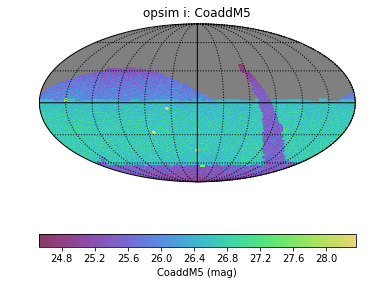

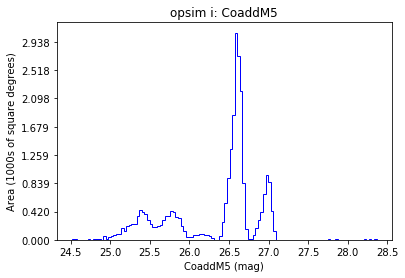

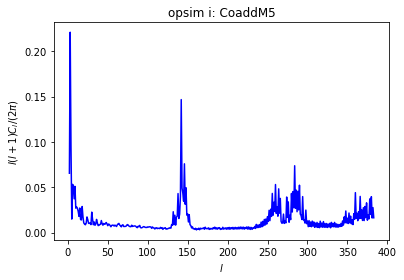

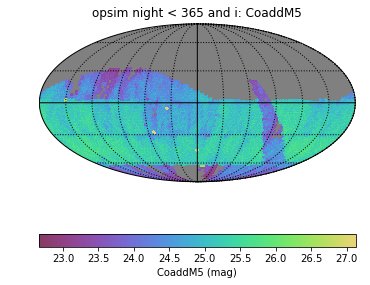

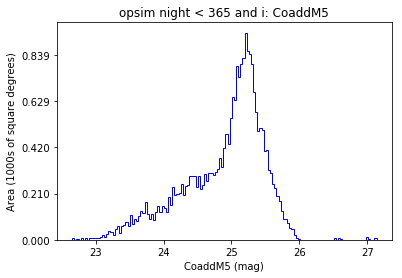

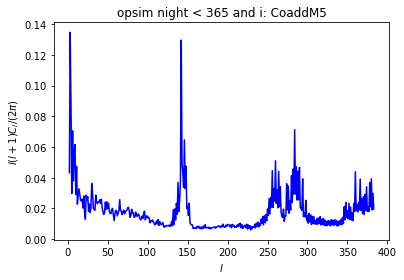

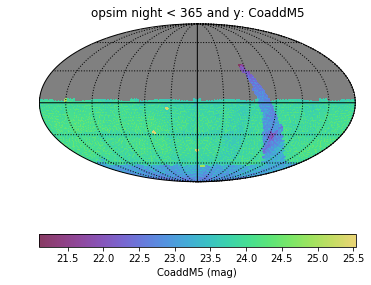

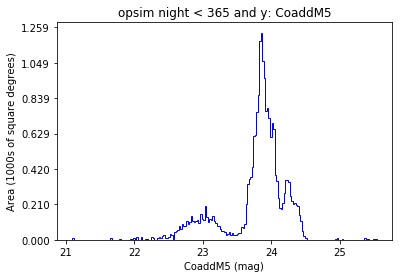

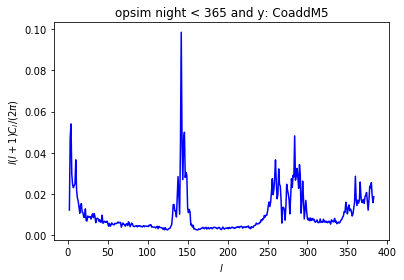

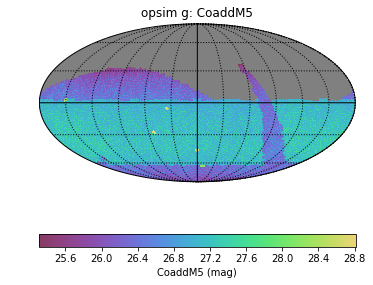

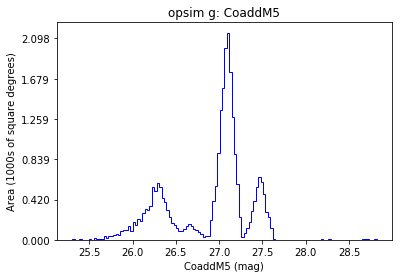

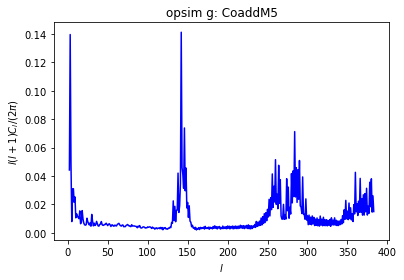

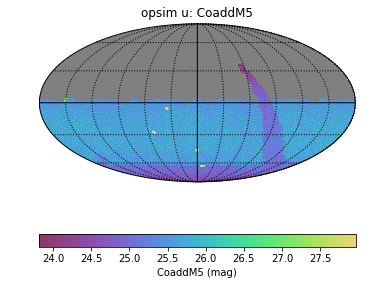

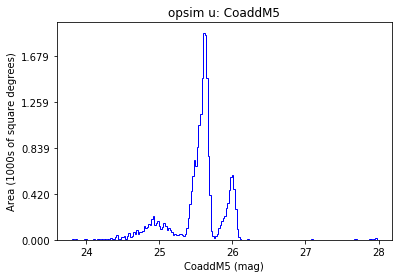

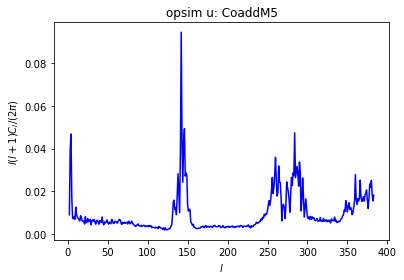

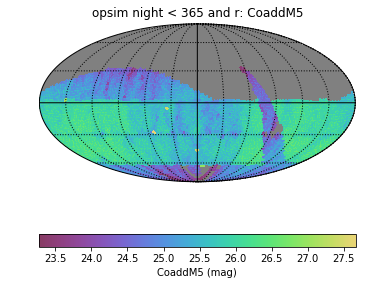

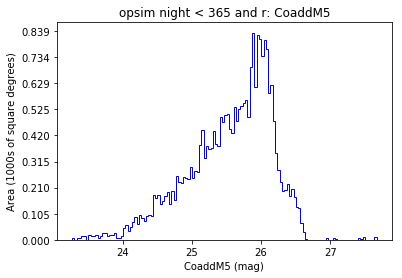

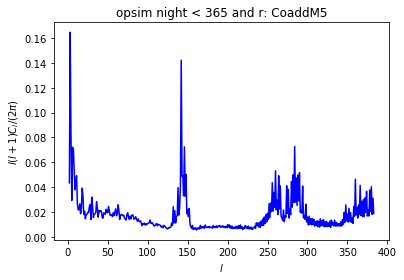

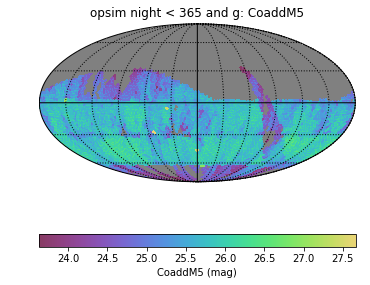

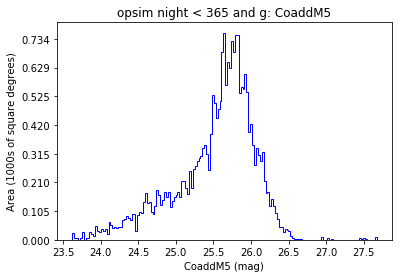

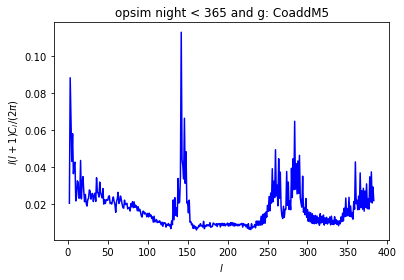

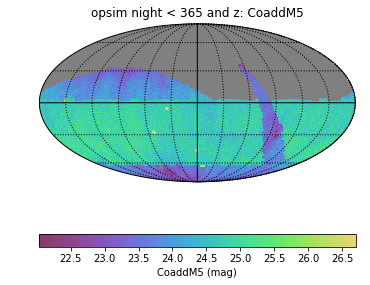

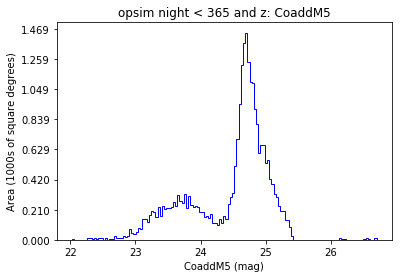

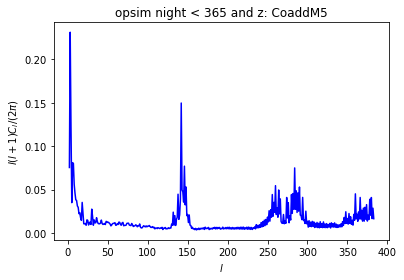

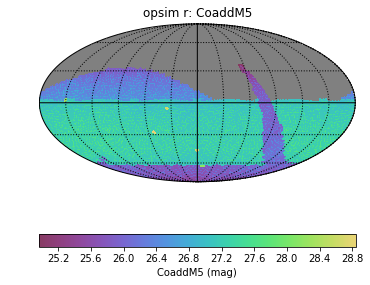

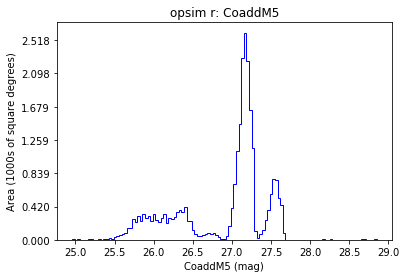

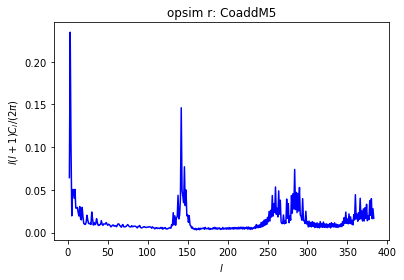

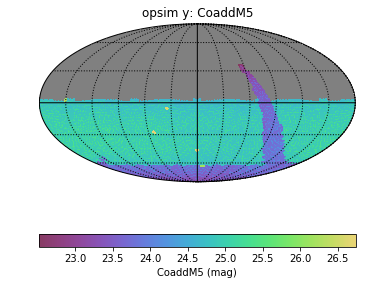

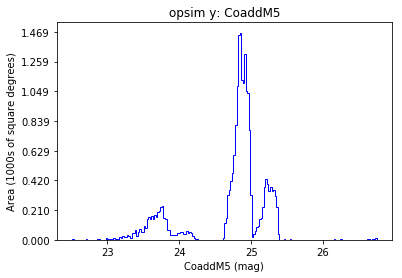

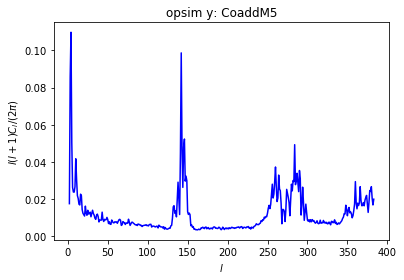

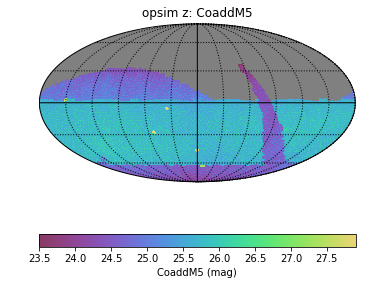

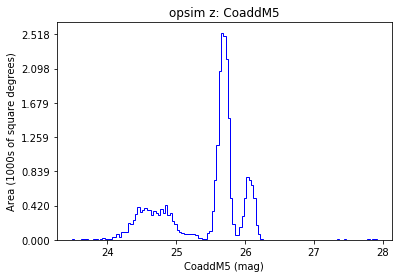

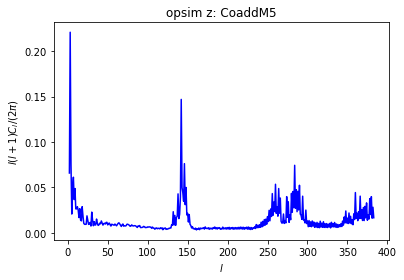

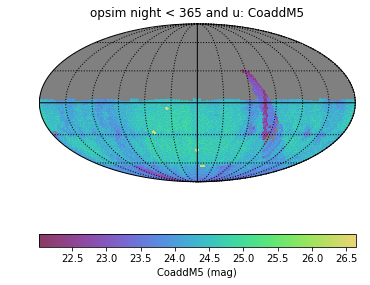

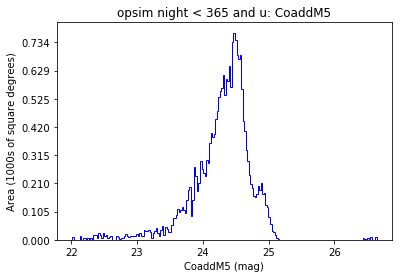

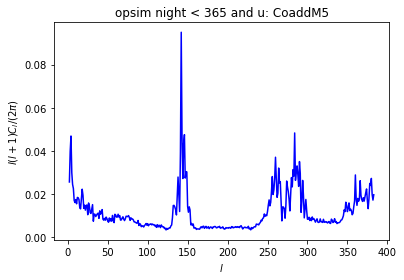

In [7]:
bg.plotAll(closefigs=False)

In [8]:
for bundle in bundleList:
    print(bundle.metadata, bundle.summaryValues)

u {'Median': 25.593438315651625}
night < 365 and u {'Median': 24.365340114252273}
g {'Median': 27.058813369707448}
night < 365 and g {'Median': 25.639700838035967}
r {'Median': 27.136312824636949}
night < 365 and r {'Median': 25.669267217721274}
i {'Median': 26.571196315062267}
night < 365 and i {'Median': 25.050434347580147}
z {'Median': 25.653425773525129}
night < 365 and z {'Median': 24.664526545127892}
y {'Median': 24.856152336639905}
night < 365 and y {'Median': 23.868665160562912}


In [9]:
# To get the signal to noise of a star 
def m52snr(m, m5):
    """
    Calculate the SNR for a star of magnitude m in an
    observation with 5-sigma limiting magnitude depth m5.
    Assumes gaussian distribution of photons and might not be
    strictly due in bluer filters. See table 2 and equation 5
    in astroph/0805.2366.

    Parameters
    ----------
    m : float or numpy.ndarray
        The magnitude of the star
    m5 : float or numpy.ndarray
        The m5 limiting magnitude of the observation

    Returns
    -------
    float or numpy.ndarray
        The SNR
    """
    snr = 5.*10.**(-0.4*(m-m5))
    return snr

In [10]:
def mag_error(m, snr):
    # https://www.eso.org/~ohainaut/ccd/sn.html
    dmag = 2.5*np.log10(1.+1./snr)
    return dmag